# 🔬 Melanoma Classification
Classifying benign and malignant skin lesions using R, Keras, and TensorFlow.

In [ ]:
# Install packages
install.packages("fastDummies")
install.packages("tfhub")

In [ ]:
# Import libraries
library(keras)
library(EBImage)
library(tidyverse)
library(keras)
library(fastDummies)
library(caret)
library(tensorflow)
library(tfhub)

In [2]:
library(repr)

In [3]:
memory.limit(size=50000)

[1] 50000

# 🔨 First Attempt
Training the model on ~150 images, and testing on ~30. 

In [30]:
# Read train file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset")
train_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset")
length(train_file_list)

[1] 153

In [37]:
# Read, resize, and unroll train images into vectors
gc()
train_melanoma_pic <- list()
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- readImage(train_file_list[i])}

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2441007,130.4,4169081,222.7,4169081,222.7
Vcells,361718257,2759.7,503711450,3843.1,474041607,3616.7


### Exploring the Data
Below are two images from the dataset. The image on the left is a benign skin lesion, and the image on the right is malignant. To start, we will have ~150 training examples and ~30 test.

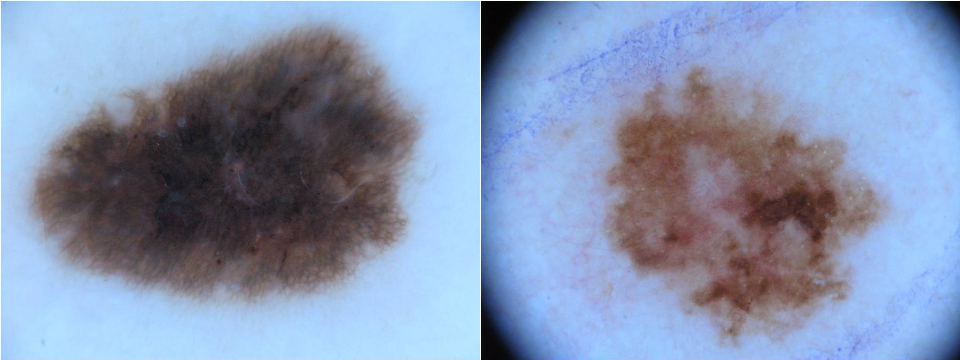

In [50]:
par(mfrow = c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
display(train_melanoma_pic[[1]])
display(train_melanoma_pic[[3]])

The following is a plot of RGB pixel intensity values across the first 9 images in the dataset.

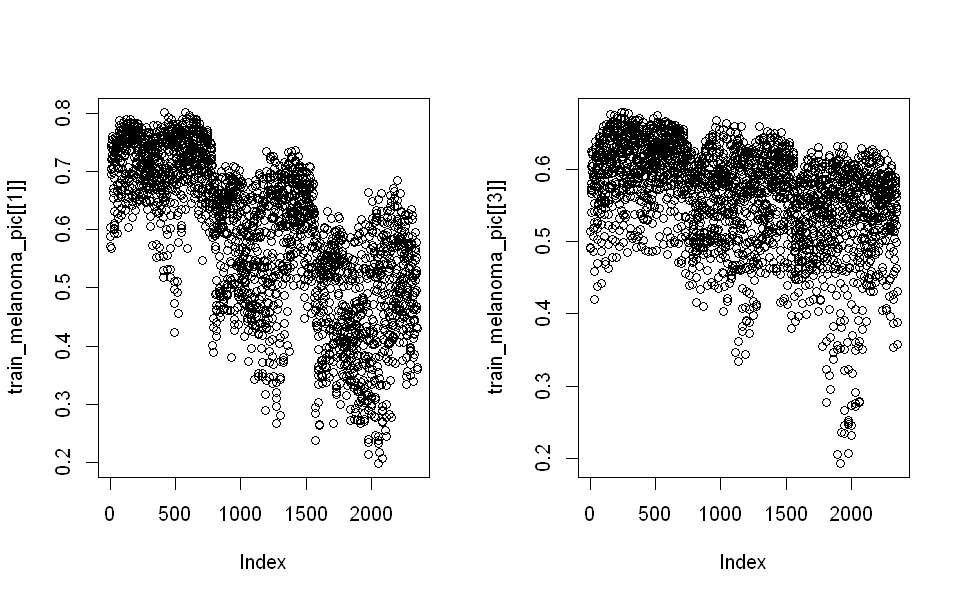

In [49]:
par(mfrow = c(1,2))
options(repr.plot.width=8, repr.plot.height=5)
plot(train_melanoma_pic[[1]])
plot(train_melanoma_pic[[3]])

### Train: Read, Resize, Unroll, & Bind

In [5]:
# Resize and unroll images into single row vectors
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- resize(train_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- array_reshape(train_melanoma_pic[[i]], c(28, 28, 3))}

In [7]:
# Row bind train images
train_x <- NULL
for (i in 1:length(train_file_list)) {train_x <- rbind(train_x, train_melanoma_pic[[i]])}

In [31]:
# Read test file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset")
test_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset")
length(test_file_list)

[1] 28

### Test: Read, Resize, Unroll, & Bind

In [9]:
# Read, resize, and unroll test images into vectors
test_melanoma_pic <- list()
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- readImage(test_file_list[i])}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- resize(test_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- array_reshape(test_melanoma_pic[[i]], c(28, 28, 3))}

In [12]:
# Row bind test images
test_x <- NULL
for (i in 1:length(test_file_list)) {test_x <- rbind(test_x, test_melanoma_pic[[i]])}

### Ground Truth
Once the images have been read and unrolled, we need to read in the ground truth labels from the labels.csv file, and convert them into one hot encoding to pass into the model

In [13]:
# Read csv file and remove first col
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification")
raw_labels <- read.csv('labels_subset.csv')
dummy = dummy_cols(raw_labels,remove_first_dummy = TRUE)

In [14]:
# Extract ground truth labels for train and test
train_y = dummy[1:153,2]
test_y = dummy[203:230,2]

In [17]:
# One hot encoding for train and test
train_labels <- to_categorical(train_y)
test_labels <- to_categorical(test_y)

### Create a Model
To start, we can train a simple 2-layer neural network and see how it performs.

In [18]:
# Create model
model <- keras_model_sequential()
model %>%
  layer_dense(units=256, activation = "relu", input_shape = c(2352)) %>%
  layer_dense(units=128, activation = "relu") %>%
  layer_dense(units=2, activation = "softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     602368      
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_2 (Dense)                     (None, 2)                       258         
Total params: 635,522
Trainable params: 635,522
Non-trainable params: 0
________________________________________________________________________________


In [19]:
# Compile model
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_rmsprop(),
          metrics = c("accuracy"))

In [20]:
# Track model history
history <- model %>%
  fit(train_x, train_labels, epochs = 30, batch_size = 32,
      validation_split = 0.2)

### Evaluate Model

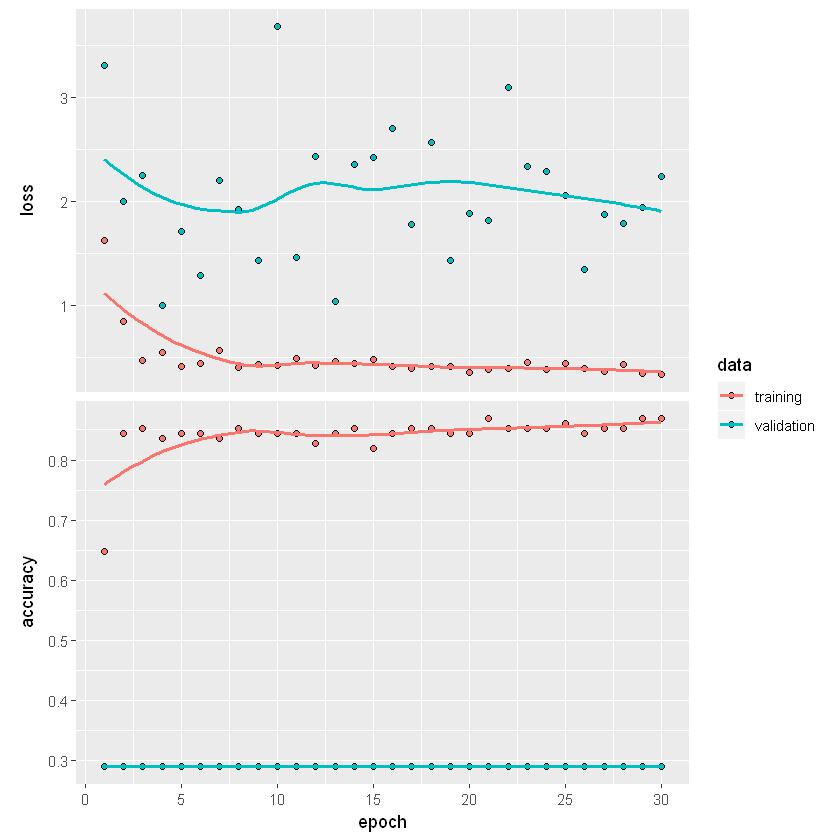

In [21]:
# Plot model loss and accuracy
plot(history)

In [23]:
# Confusion Matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = test_y)

         Actual
Predicted  0
        0 28

# 🎯 Improving Accuracy
Training on 1000 images, testing on 50. Also trying a different network architecture.

In [33]:
# Read train file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset_1k")
train_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\images_subset_1k")
length(train_file_list)

[1] 1000

### Preparing Data
Once we read in the image files, we should also resize them into smaller images and unroll the matrices into single vector arrays for training. This will be done for both train and test.

### Train: Read, Resize, Unroll, & Bind

In [6]:
# Read, resize, and unroll train images into vectors
gc()
train_melanoma_pic <- list()
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- readImage(train_file_list[i])}

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2266798,121.1,4165335,222.5,4165335,222.5
Vcells,3850022,29.4,8388608,64.0,8378028,64.0


In [7]:
# Resize and unroll images into single row vectors
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- resize(train_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(train_file_list)) {train_melanoma_pic[[i]] <- array_reshape(train_melanoma_pic[[i]], c(28, 28, 3))}

In [10]:
# Row bind train images
train_x <- NULL
for (i in 1:length(train_file_list)) {train_x <- rbind(train_x, train_melanoma_pic[[i]])}

### Test: Read, Resize, Unroll, & Bind

In [32]:
# Read test file names
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset_1k")
test_file_list <- list.files(path="C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\test_images_subset_1k")
length(test_file_list)

[1] 50

In [12]:
# Read, resize, and unroll test images into vectors
test_melanoma_pic <- list()
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- readImage(test_file_list[i])}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- resize(test_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(test_file_list)) {test_melanoma_pic[[i]] <- array_reshape(test_melanoma_pic[[i]], c(28, 28, 3))}

In [15]:
# Row bind test images
test_x <- NULL
for (i in 1:length(test_file_list)) {test_x <- rbind(test_x, test_melanoma_pic[[i]])}

### Ground Truth
Once the images have been read and unrolled, we need to read in the ground truth labels from the labels.csv file, and convert them into one hot encoding to pass into the model

In [24]:
# Read csv file and remove first col
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification")
raw_labels <- read.csv('labels_1k.csv')
dummy = dummy_cols(raw_labels,remove_first_dummy = TRUE)

In [17]:
# Extract ground truth labels for train and test
train_y = dummy[1:1000, 2]
test_y = dummy[1001:1050,2]

In [18]:
# One hot encoding for train and test
train_labels <- to_categorical(train_y)
test_labels <- to_categorical(test_y)

### Create a Deeper Model
This time, we train a deeper neural network with 3 dropout layers.

In [32]:
# Try a different model
model <- keras_model_sequential()
model %>%
    layer_dense(units=512, activation="relu", input_shape=c(2352)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=256, activation="relu") %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=64, activation="relu") %>%
    layer_dropout(rate=0.2) %>%
    layer_dense(units=2, activation="softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 512)                     1204736     
________________________________________________________________________________
dropout (Dropout)                   (None, 512)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 256)                     131328      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 64)                      16448       
________________________________________________________________________________
dropout_

In [18]:
# Compile model
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_rmsprop(),
          metrics = c("binary_accuracy"))

In [21]:
# Track model history
history <- model %>%
  fit(train_x, train_labels, epochs = 50, batch_size = 32,
      validation_split = 0.2)

### Evaluate Model

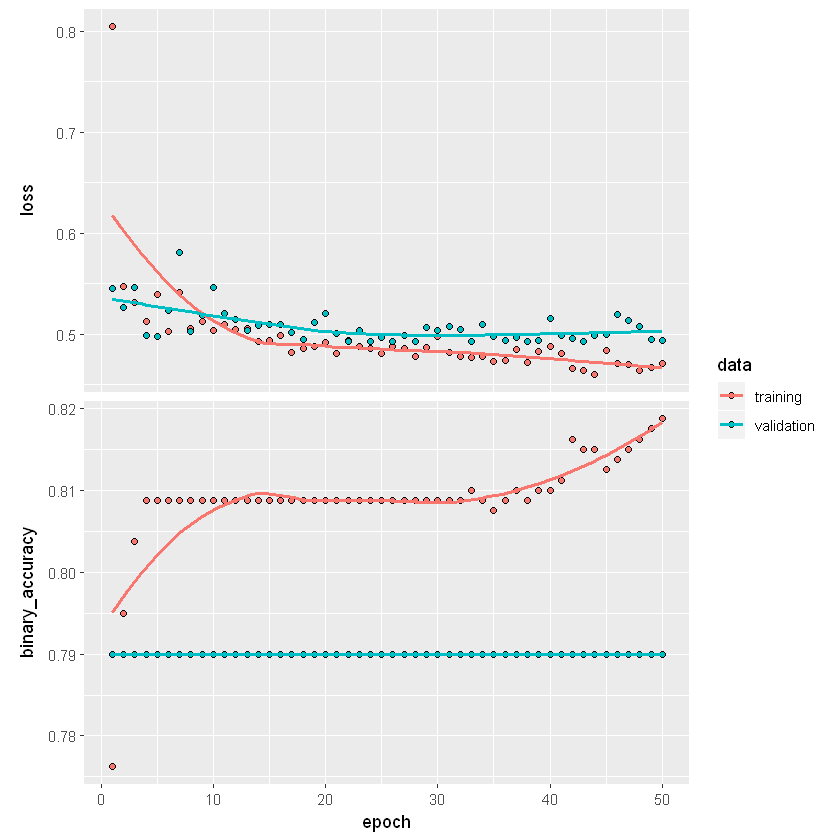

In [20]:
plot(history)

In [22]:
# Confusion Matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = test_y)

         Actual
Predicted  0  1
        0 45  5

# ✌ Dealing with Skewed Classes
Although the model seems to be performing reasonably well with an accuracy of ~80%, it is apparent from the unchanging accuracy value that it is not actually learning. This can also be seen in the confusion matrix, which consistently predicts a class of '0' (benign) for all examples. This is a problem of skewed classes in our data, which contains mostly benign examples.

In [30]:
table(raw_labels$MEL)


  0   1 
850 200 

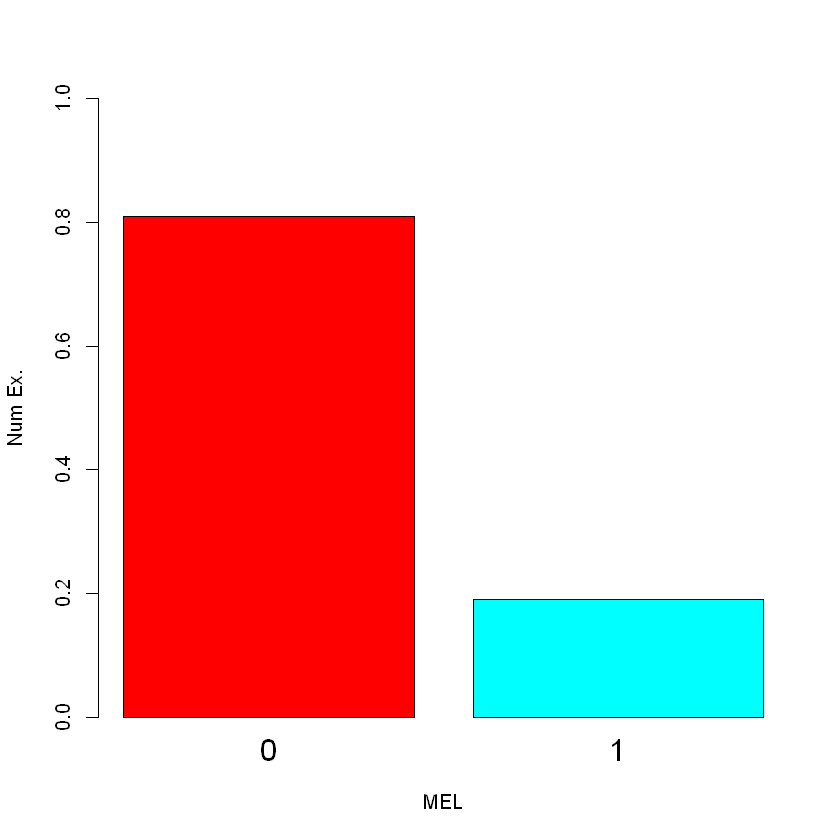

In [29]:
barplot(prop.table((table(raw_labels$MEL))), 
       col=rainbow(2),
        ylim=c(0,1),
        xlab="MEL",
        ylab="Num Ex.",
        cex.names=1.5
       )

In [31]:
# Calculate class weights
850/200

[1] 4.25

### Adjusting the Model
As is shown in the bar chart and calculation above, benign examples are 4.25 times more prevalent than malignant examples in our dataset. We can pass this value into a class_weight parameter when fitting our model.

In [60]:
# Compile model
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_adam(),
          metrics = c("binary_accuracy"))

In [61]:
# Track model history
history <- model %>%
  fit(train_x, 
      train_labels, 
      epochs = 150, 
      batch_size = 32,
      validation_split = 0.2,
      class_weight = list("0" = 1, "1" = 4.25)
     )

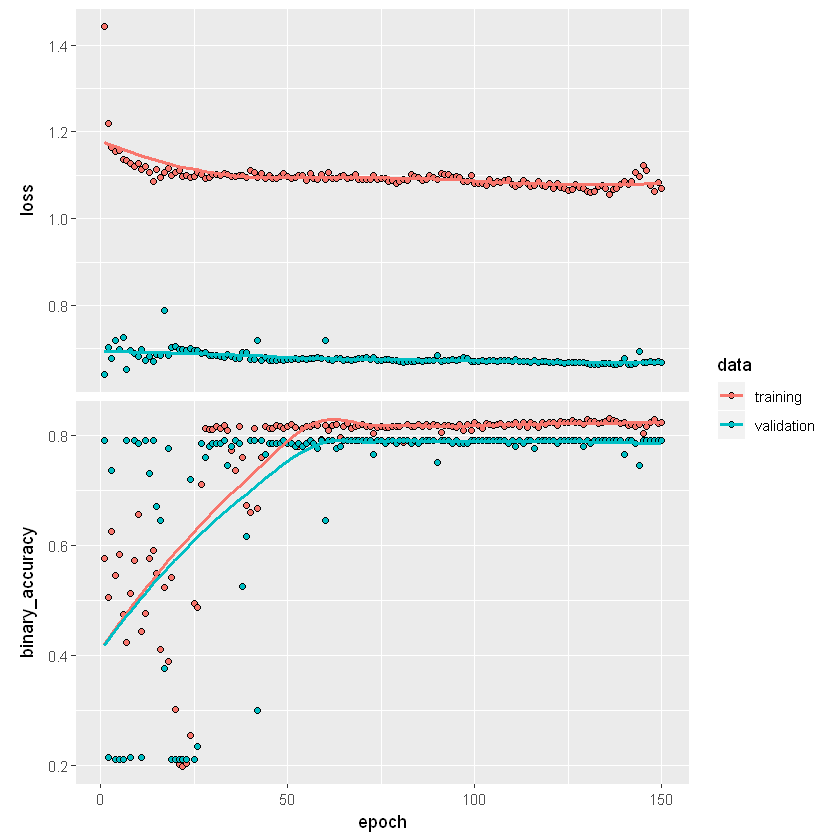

In [62]:
# Plot the new history
plot(history)

In [63]:
# Create a new confusion Matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = test_y)

         Actual
Predicted  0  1
        0 45  5

### Evaluation
Though the accuracy in this case is much more dynamic, the plot for loss is a classic indicator of high variance, and the confusion matrix shows that the model is always predicting '0'. It seems the problem of skewed classes still hasn't been solved.

# 📏 Balancing Data
To mitigate the skewed classes, we can also try balancing the dataset. To do so, we can select an equal number of positive and negative examples, and train the model on this new, balanced dataset.

In [426]:
memory.limit(size=50000)

[1] 50000

In [4]:
# Read csv file and remove first col
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification")
raw_labels <- read.csv('labels_2k.csv')
dummy = dummy_cols(raw_labels,remove_first_dummy = TRUE)

### Manual Class Selection

In [5]:
dummy %>%
    filter(MEL %in% c("1")) -> new_data_pos
pos_file_list <- new_data_pos[1:495]

In [6]:
dummy %>%
    filter(MEL %in% c("0")) -> new_data_neg
neg_file_list <- new_data_neg[1:495]

The above code blocks selected 495-row chunks of both positive and negative examples from the dataset. Now, we can choose a subset of each of these newly selected examples.

In [7]:
subset_size <- 200

In [8]:
pos_subset <- new_data_pos[c(1:subset_size),]

In [9]:
neg_subset <- new_data_neg[c(1:subset_size),]

### Bind and Shuffle
Now, we can combine the positive and negative examples and shuffle the data.

In [10]:
balanced_data <- rbind(pos_subset, neg_subset)

In [11]:
balanced_data_shuffled <- balanced_data[sample(nrow(balanced_data)),]

In [12]:
bd_train_break <- (subset_size*2*0.8)+1
bd_test_start <- bd_train_break + 1
bd_end <- dim(balanced_data_shuffled)[1]

In [13]:
balanced_data_train <- balanced_data_shuffled[c(1:bd_train_break),]
balanced_data_test <- balanced_data_shuffled[c(bd_test_start:bd_end),]

### Extract File Names and Labels

In [34]:
bd_train_files <- as.character(balanced_data_train$file)
bd_test_files <- as.character(balanced_data_test$file)
length(bd_train_files)
length(bd_test_files)

[1] 321

[1] 79

In [15]:
bd_train_y <- balanced_data_train$MEL
bd_test_y <- balanced_data_test$MEL

In [16]:
# One hot encoding for train and test
train_labels <- to_categorical(bd_train_y)
test_labels <- to_categorical(bd_test_y)

### Read and Transform
Finally, we can read and preprocess the balanced and shuffled images for training.

In [17]:
library("dplyr")
setwd("C:\\Users\\alif-\\Projects\\r-tensorflow\\melanoma-classification\\combined_2k")

In [18]:
# Read, resize, and unroll test images into vectors
train_melanoma_pic <- list()
for (i in 1:length(bd_train_files)) {train_melanoma_pic[[i]] <- readImage(bd_train_files[i])}
for (i in 1:length(bd_train_files)) {train_melanoma_pic[[i]] <- resize(train_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(bd_train_files)) {train_melanoma_pic[[i]] <- array_reshape(train_melanoma_pic[[i]], c(28, 28, 3))}

In [19]:
# Row bind train images
train_x <- NULL
for (i in 1:length(bd_train_files)) {train_x <- rbind(train_x, train_melanoma_pic[[i]])}

In [20]:
# Read, resize, and unroll test images into vectors
test_melanoma_pic <- list()
for (i in 1:length(bd_test_files)) {test_melanoma_pic[[i]] <- readImage(bd_test_files[i])}
for (i in 1:length(bd_test_files)) {test_melanoma_pic[[i]] <- resize(test_melanoma_pic[[i]], 28, 28)}
for (i in 1:length(bd_test_files)) {test_melanoma_pic[[i]] <- array_reshape(test_melanoma_pic[[i]], c(28, 28, 3))}

In [21]:
# Row bind test images
test_x <- NULL
for (i in 1:length(bd_test_files)) {test_x <- rbind(test_x, test_melanoma_pic[[i]])}

### Evaluate Balanced Model

In [22]:
# Try a different model
model <- keras_model_sequential()
model %>%
    layer_dense(units=512, activation="relu", input_shape=c(2352)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=256, activation="relu") %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=64, activation="relu") %>%
    layer_dropout(rate=0.2) %>%
    layer_dense(units=2, activation="softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 512)                     1204736     
________________________________________________________________________________
dropout (Dropout)                   (None, 512)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 256)                     131328      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 64)                      16448       
________________________________________________________________________________
dropout_

In [23]:
# Compile model
model %>%
  compile(loss = "binary_crossentropy",
          optimize = optimizer_adam(),
          metrics = c("accuracy"))

In [24]:
# Track model history
history <- model %>%
  fit(train_x, 
      train_labels, 
      epochs = 150, 
      batch_size = 32,
      validation_split = 0.2
     )

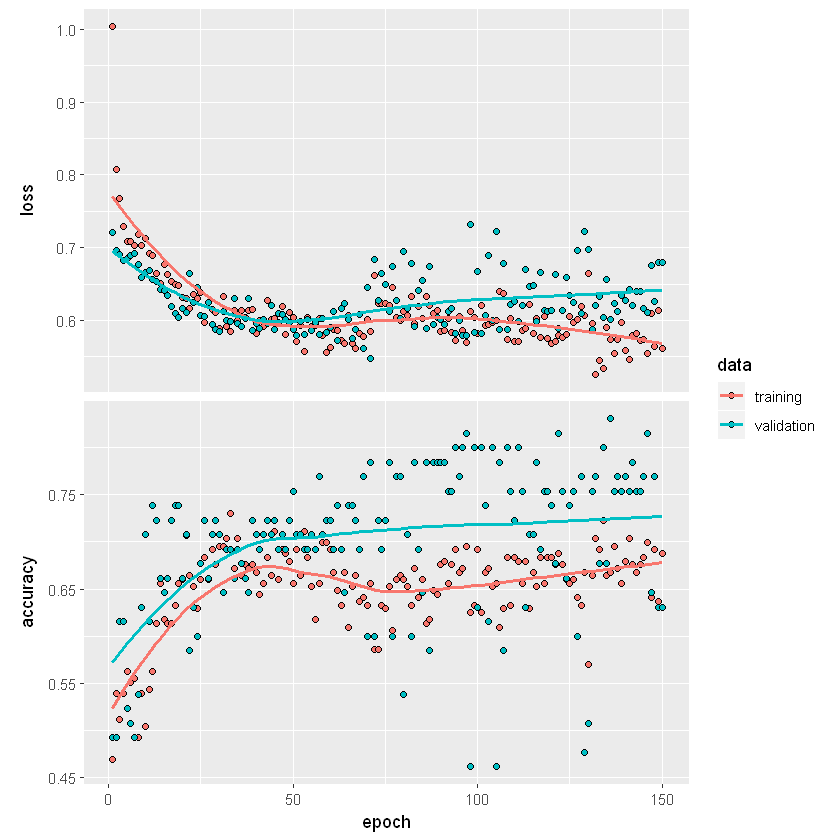

In [42]:
# Plot the new history
plot(history)

In [44]:
# Create a new confusion Matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = bd_test_y)

         Actual
Predicted  0  1
        0 21  9
        1 17 32

# Success 🎉 
Although there is still much room for improvement, the model is now able to classify both positive and negative examples with an accuracy of about ~70%!